In [5]:
# %%
import numpy as np
import matplotlib.pyplot as plt
import os

# ------------------------------
# TU Delft colour palette
# ------------------------------
TUD_BLUE = "#00A6D6"
TUD_DARK_BLUE = "#003C8F"
TUD_LIGHT_BLUE = "#6DCFF6"
TUD_ORANGE = "#FF8F00"
TUD_DARK_GREY = "#4D4D4D"
TUD_LIGHT_GREY = "#D9D9D9"

plt.rcParams.update({
    "figure.figsize": (7, 4),
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.28,
    "axes.prop_cycle": plt.cycler(color=[TUD_DARK_BLUE, TUD_BLUE, TUD_ORANGE, TUD_DARK_GREY]),
    "font.size": 12,
})

outdir = "notebooks/plaatjes/figures"

def savefig(name: str):
    os.makedirs(outdir, exist_ok=True)
    path = os.path.join(outdir, f"{name}.png")
    plt.savefig(path, dpi=300, bbox_inches="tight")
    print(f"Saved: {path}")



Saved: notebooks/plaatjes/figures\L1.png


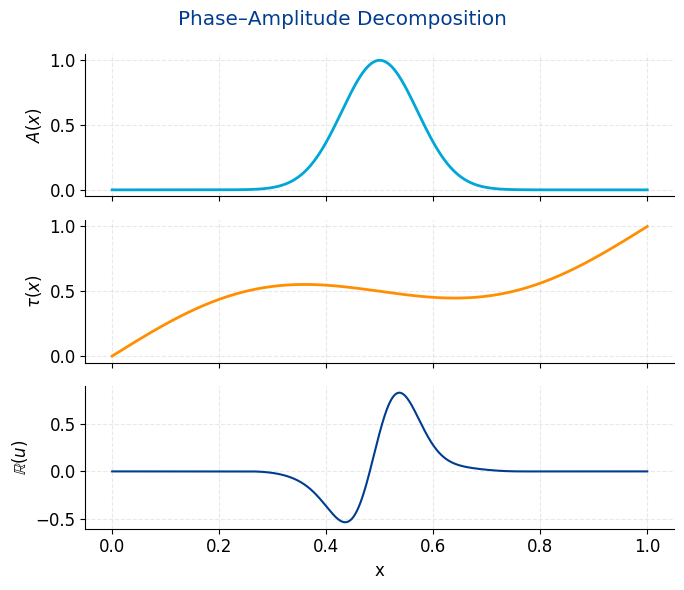

In [28]:
# %% L1 Phase–Amplitude Decomposition
x = np.linspace(0, 1, 2000)

tau = x + 0.25 * np.sin(2 * np.pi * x)
A   = np.exp(-((x - 0.5) ** 2) / 0.01)
omega = 40
u = A * np.exp(1j * omega * tau)

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(7,6))
fig.suptitle("Phase–Amplitude Decomposition", color=TUD_DARK_BLUE)

axes[0].plot(x, A, lw=2, color=TUD_BLUE)
axes[0].set_ylabel(r"$A(x)$")

axes[1].plot(x, tau, lw=2, color=TUD_ORANGE)
axes[1].set_ylabel(r"$\tau(x)$")

axes[2].plot(x, np.real(u), lw=1.5, color=TUD_DARK_BLUE)
axes[2].set_ylabel(r"$\mathbb{R}(u)$")
axes[2].set_xlabel("x")

plt.tight_layout()
savefig("L1")
plt.show()


Saved: notebooks/plaatjes/figures\L2.png


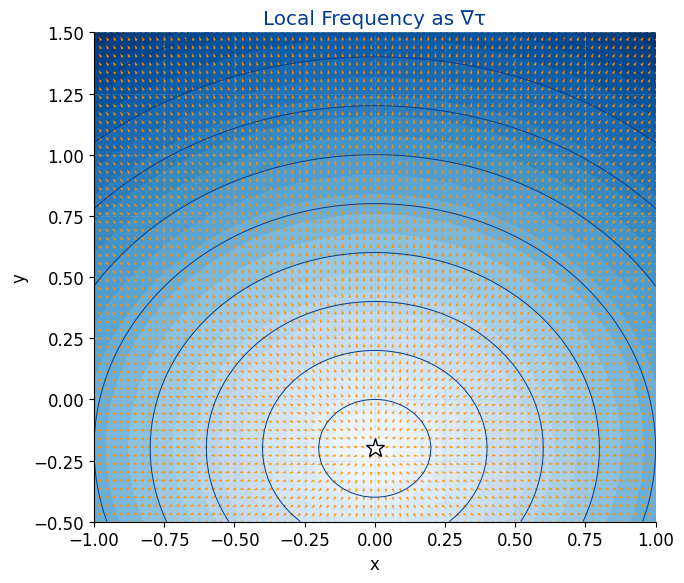

In [29]:
# %% L2 ∇τ Vector Field
nx, ny = 80, 60
x = np.linspace(-1, 1, nx)
y = np.linspace(-0.5, 1.5, ny)
X, Y = np.meshgrid(x, y)

x0, y0 = 0, -0.2
tau = np.sqrt((X - x0)**2 + (Y - y0)**2)

dy = y[1] - y[0]
dx = x[1] - x[0]
tau_x = np.gradient(tau, axis=1) / dx
tau_y = np.gradient(tau, axis=0) / dy

norm = np.sqrt(tau_x**2 + tau_y**2) + 1e-10
gx, gy = tau_x/norm, tau_y/norm

fig, ax = plt.subplots(figsize=(7,6))
cf = ax.contourf(X, Y, tau, 25, cmap="Blues")
ax.contour(X, Y, tau, 12, colors=TUD_DARK_BLUE, linewidths=0.7)
ax.quiver(X, Y, gx, gy, color=TUD_ORANGE, alpha=0.9)

ax.plot(x0, y0, "*", color="white", markersize=14, markeredgecolor="black")
ax.set_title("Local Frequency as ∇τ", color=TUD_DARK_BLUE)
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.tight_layout()
savefig("L2")
plt.show()


Saved: notebooks/plaatjes/figures\L3.png


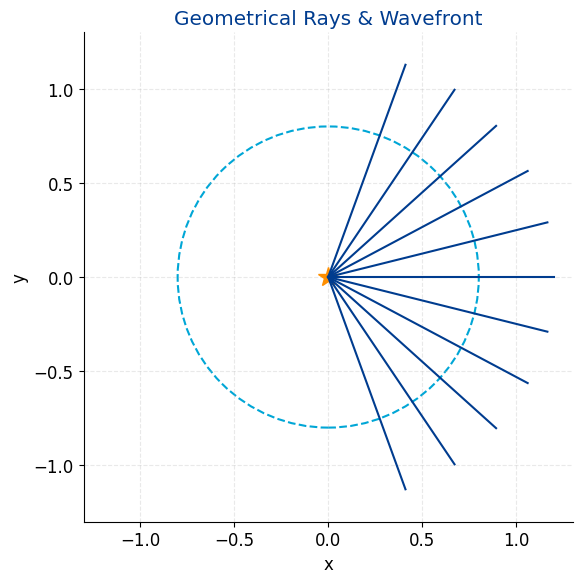

In [30]:
# %% L3 Ray Tracing
fig, ax = plt.subplots(figsize=(7,6))
source = np.array([0, 0])
ax.plot(0, 0, "*", color=TUD_ORANGE, markersize=15)

angles = np.linspace(-70, 70, 11) * np.pi/180
r = 1.2
for th in angles:
    ax.plot([0, r*np.cos(th)], [0, r*np.sin(th)], color=TUD_DARK_BLUE)

circle = plt.Circle((0,0), 0.8, edgecolor=TUD_BLUE, facecolor="none", linestyle="--", lw=1.5)
ax.add_patch(circle)

ax.set_aspect("equal")
ax.set_xlim(-1.3,1.3)
ax.set_ylim(-1.3,1.3)
ax.set_title("Geometrical Rays & Wavefront", color=TUD_DARK_BLUE)
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.tight_layout()
savefig("L3")
plt.show()


Saved: notebooks/plaatjes/figures\L4_outward.png


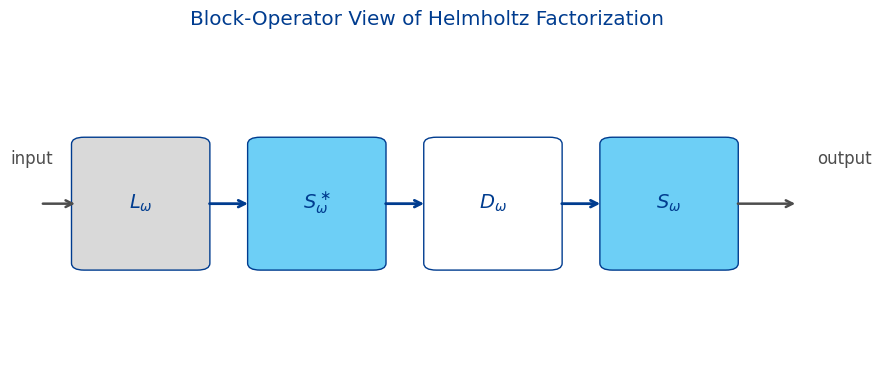

In [31]:
# %% L4 Block-Operator Factorization Diagram (with outward output arrow)
from matplotlib.patches import FancyBboxPatch

fig, ax = plt.subplots(figsize=(9, 4))
ax.axis("off")

# --- layout parameters ---
y_center   = 0.5
label_y    = 0.63
box_width  = 0.18
box_height = 0.35
gap        = 0.10
arrow_pad  = 0.015

# x-positions
x_L     = 0.08
x_Sstar = x_L + box_width + gap
x_D     = x_Sstar + box_width + gap
x_S     = x_D + box_width + gap

# --- Boxes ---
boxes = [
    (x_L,     r"$L_\omega$",     TUD_LIGHT_GREY),
    (x_Sstar, r"$S_\omega^\ast$", TUD_LIGHT_BLUE),
    (x_D,     r"$D_\omega$",      "white"),
    (x_S,     r"$S_\omega$",      TUD_LIGHT_BLUE),
]

for x, label, color in boxes:
    rect = FancyBboxPatch(
        (x, y_center - box_height/2), box_width, box_height,
        boxstyle="round,pad=0.02",
        edgecolor=TUD_DARK_BLUE, facecolor=color
    )
    ax.add_patch(rect)
    ax.text(x + box_width/2, y_center, label,
            ha="center", va="center", fontsize=14, color=TUD_DARK_BLUE)

# --- Helper for arrows between internal blocks ---
def arrow_between(x_left, x_right):
    ax.annotate(
        "",
        xy=(x_right - arrow_pad, y_center),
        xytext=(x_left + box_width + arrow_pad, y_center),
        arrowprops=dict(arrowstyle="->", color=TUD_DARK_BLUE, lw=2)
    )

arrow_between(x_L, x_Sstar)
arrow_between(x_Sstar, x_D)
arrow_between(x_D, x_S)

# --- Input arrow ---
ax.text(0.03, label_y, "input", va="center", ha="right", color=TUD_DARK_GREY)
ax.annotate(
    "",
    xy=(x_L - 0.01, y_center),
    xytext=(0.01, y_center),
    arrowprops=dict(arrowstyle="->", color=TUD_DARK_GREY, lw=1.8)
)

# --- Output arrow (OUTWARD) ---
out_arrow_start = x_S + box_width + arrow_pad
out_arrow_end   = out_arrow_start + 0.10   # longer outward arrow

ax.annotate(
    "",
    xy=(out_arrow_end, y_center),
    xytext=(out_arrow_start, y_center),
    arrowprops=dict(arrowstyle="->", color=TUD_DARK_GREY, lw=1.8)
)

ax.text(out_arrow_end + 0.03, label_y, "output",
        va="center", ha="left", color=TUD_DARK_GREY)

# ---
ax.set_xlim(0, 1.25)
ax.set_ylim(0, 1)
ax.set_title("Block-Operator View of Helmholtz Factorization", color=TUD_DARK_BLUE)

plt.tight_layout()
savefig("L4_outward")
plt.show()


Saved: notebooks/plaatjes/figures\L5.png


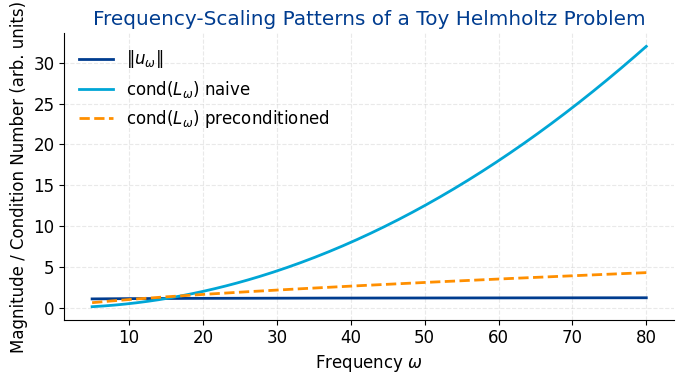

In [32]:
# %% L5 Frequency-Scaling Patterns
omega = np.linspace(5, 80, 200)

# Toy curves: "solution norm" ~ O(1), condition number ~ ω^2
solution_norm = 1.0 + 0.05 * np.log(omega)
cond_naive = 0.005 * omega**2
cond_precond = 0.2 * omega**0.7

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(omega, solution_norm, label=r"$\|u_\omega\|$", lw=2)
ax.plot(omega, cond_naive, label="cond$(L_\\omega)$ naive", lw=2)
ax.plot(omega, cond_precond, label="cond$(L_\\omega)$ preconditioned", lw=2, linestyle="--")

ax.set_xlabel(r"Frequency $\omega$")
ax.set_ylabel("Magnitude / Condition Number (arb. units)")
ax.set_title("Frequency-Scaling Patterns of a Toy Helmholtz Problem", color=TUD_DARK_BLUE)
ax.legend(frameon=False)

plt.tight_layout()
savefig("L5")
plt.show()


Saved: notebooks/plaatjes/figures\L6.png


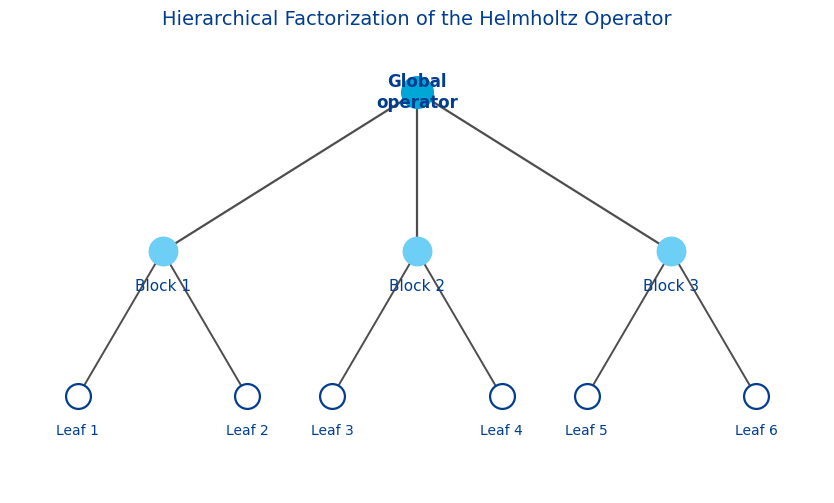

In [38]:
# %% L6 Hierarchical Factorization Tree — improved readability
fig, ax = plt.subplots(figsize=(8.5, 5.2))
ax.axis("off")

# Positions for nodes (x, y)
root = (0.5, 0.88)
mid_y  = 0.55
leaf_y = 0.25
mid_nodes = [(0.2, mid_y), (0.5, mid_y), (0.8, mid_y)]
leaf_nodes = [
    (0.1, leaf_y), (0.3, leaf_y),
    (0.4, leaf_y), (0.6, leaf_y),
    (0.7, leaf_y), (0.9, leaf_y),
]

# --- Draw connecting lines first (behind nodes) ---
for i, (x, y) in enumerate(mid_nodes, start=1):
    ax.plot([root[0], x], [root[1], y], color=TUD_DARK_GREY, lw=1.6, zorder=0)

for i, (x, y) in enumerate(leaf_nodes, start=1):
    if i <= 2:
        parent = mid_nodes[0]
    elif i <= 4:
        parent = mid_nodes[1]
    else:
        parent = mid_nodes[2]
    ax.plot([parent[0], x], [parent[1], y], color=TUD_DARK_GREY, lw=1.4, zorder=0)

# --- Root node ---
ax.scatter(*root, s=520, color=TUD_BLUE, zorder=2)
ax.text(
    root[0], root[1], "Global\noperator",
    ha="center", va="center",
    color=TUD_DARK_BLUE, fontsize=12, fontweight="bold", zorder=3
)

# --- Mid-level blocks ---
for i, (x, y) in enumerate(mid_nodes, start=1):
    ax.scatter(x, y, s=420, color=TUD_LIGHT_BLUE, zorder=2)
    # label slightly BELOW the node for readability
    ax.text(
        x, y - 0.055, f"Block {i}",
        ha="center", va="top",
        fontsize=11, color=TUD_DARK_BLUE, fontweight="medium", zorder=3
    )

# --- Leaf blocks ---
for i, (x, y) in enumerate(leaf_nodes, start=1):
    ax.scatter(
        x, y, s=320,
        facecolor="white",
        edgecolors=TUD_DARK_BLUE,
        linewidths=1.6,
        zorder=2
    )
    # label BELOW the leaf node
    ax.text(
        x, y - 0.055, f"Leaf {i}",
        ha="center", va="top",
        fontsize=10, color=TUD_DARK_BLUE, zorder=3
    )

# --- Layout / title ---
ax.set_xlim(0.02, 0.98)
ax.set_ylim(0.05, 0.98)
ax.set_title(
    "Hierarchical Factorization of the Helmholtz Operator",
    color=TUD_DARK_BLUE,
    fontsize=14,
    pad=14
)

fig.tight_layout()
savefig("L6")
plt.show()


Saved: notebooks/plaatjes/figures\L7.png


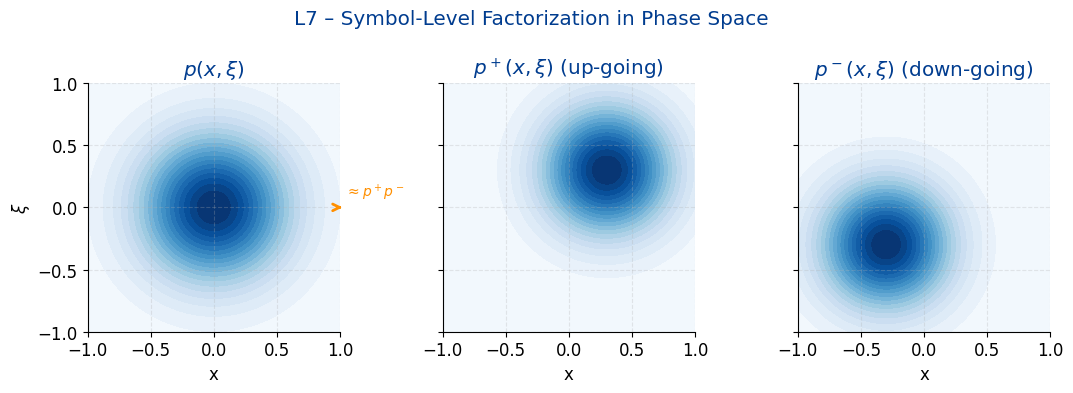

In [13]:
# %% L7 Symbol-Level Factorization Diagram
fig, axes = plt.subplots(1, 3, figsize=(11,4), sharey=True)

# Coarse grid for "symbol blobs"
x = np.linspace(-1, 1, 200)
xi = np.linspace(-1, 1, 200)
X, XI = np.meshgrid(x, xi)

# Gaussian blobs for visualization
p = np.exp(-3*(X**2 + XI**2))
p_plus = np.exp(-4*((X-0.3)**2 + (XI-0.3)**2))
p_minus = np.exp(-4*((X+0.3)**2 + (XI+0.3)**2))

# (a) full symbol
cs0 = axes[0].contourf(X, XI, p, 20, cmap="Blues")
axes[0].set_title(r"$p(x,\xi)$", color=TUD_DARK_BLUE)
axes[0].set_xlabel("x")
axes[0].set_ylabel(r"$\xi$")

# (b) p+
cs1 = axes[1].contourf(X, XI, p_plus, 20, cmap="Blues")
axes[1].set_title(r"$p^+(x,\xi)$ (up-going)", color=TUD_DARK_BLUE)
axes[1].set_xlabel("x")

# (c) p-
cs2 = axes[2].contourf(X, XI, p_minus, 20, cmap="Blues")
axes[2].set_title(r"$p^-(x,\xi)$ (down-going)", color=TUD_DARK_BLUE)
axes[2].set_xlabel("x")

# arrows indicating factorization
axes[0].annotate("", xy=(1.02, 0.5), xytext=(0.98, 0.5),
                 xycoords=("axes fraction", "axes fraction"),
                 arrowprops=dict(arrowstyle="->", color=TUD_ORANGE, lw=2))

axes[0].text(1.02, 0.52, r"$\approx p^+ p^-$", transform=axes[0].transAxes,
             color=TUD_ORANGE, fontsize=10, va="bottom")

plt.suptitle("L7 – Symbol-Level Factorization in Phase Space", color=TUD_DARK_BLUE)
plt.tight_layout()
savefig("L7")
plt.show()


Saved: notebooks/plaatjes/figures\L8.png


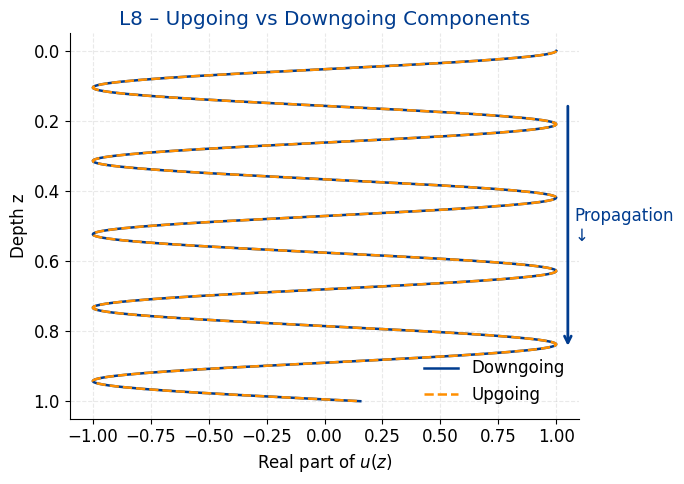

In [14]:
# %% L8 Upgoing vs Downgoing Wave Components
z = np.linspace(0, 1, 400)
k = 30  # wavenumber

# downgoing: exp(+ikz); upgoing: exp(-ikz)
down = np.cos(k * z)
up = np.cos(-k * z)

fig, ax = plt.subplots(figsize=(7,5))

# plot as functions of depth
ax.plot(down, z, label="Downgoing", lw=1.8, color=TUD_DARK_BLUE)
ax.plot(up,   z, label="Upgoing",   lw=1.8, color=TUD_ORANGE, linestyle="--")

# direction arrows
ax.annotate("", xy=(1.05, 0.15), xytext=(1.05, 0.85),
            arrowprops=dict(arrowstyle="<-", color=TUD_DARK_BLUE, lw=2))
ax.text(1.08, 0.5, "Propagation\n↓", va="center", color=TUD_DARK_BLUE)

ax.invert_yaxis()
ax.set_xlabel(r"Real part of $u(z)$")
ax.set_ylabel("Depth z")
ax.set_title("L8 – Upgoing vs Downgoing Components", color=TUD_DARK_BLUE)
ax.legend(frameon=False)

plt.tight_layout()
savefig("L8")
plt.show()


Saved: notebooks/plaatjes/figures\L9_compact_box.png


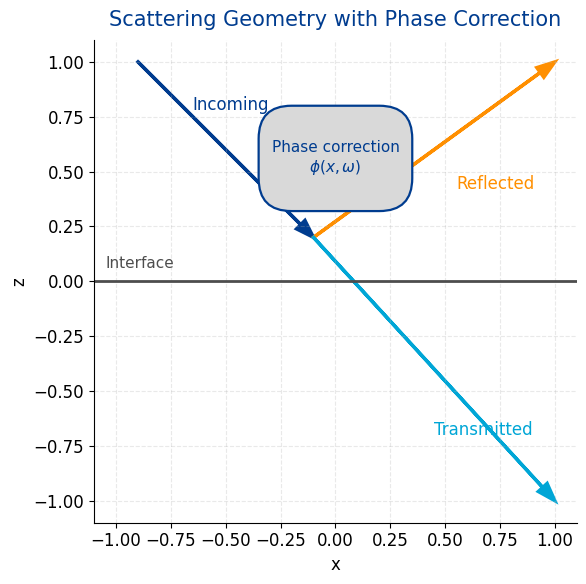

In [43]:
# %% L9 – Scattering Geometry with Phase Correction — compact box
fig, ax = plt.subplots(figsize=(7.5, 6))

# --- Interface ---
ax.axhline(0, color=TUD_DARK_GREY, lw=2)
ax.text(-1.05, 0.06, "Interface", color=TUD_DARK_GREY, fontsize=11)

# Geometry
x0, y0 = -0.9, 1.0
xi, yi = -0.1, 0.2
xr, yr = 1.0, 1.0
xt, yt = 1.0, -1.0

# --- Incoming ---
ax.arrow(x0, y0, xi-x0, yi-y0, length_includes_head=True,
         head_width=0.055, lw=2.4, color=TUD_DARK_BLUE)
ax.text(-0.65, 0.78, "Incoming", color=TUD_DARK_BLUE, fontsize=12)

# --- Reflected ---
ax.arrow(xi, yi, xr-xi, yr-yi, length_includes_head=True,
         head_width=0.055, lw=2.4, color=TUD_ORANGE)
ax.text(0.55, 0.42, "Reflected", color=TUD_ORANGE, fontsize=12)

# --- Transmitted ---
ax.arrow(xi, yi, xt-xi, yt-yi, length_includes_head=True,
         head_width=0.055, lw=2.4, color=TUD_BLUE)
ax.text(0.45, -0.70, "Transmitted", color=TUD_BLUE, fontsize=12)

# --- MUCH SMALLER phase-correction box ---
from matplotlib.patches import FancyBboxPatch

box_width  = 0.40
box_height = 0.18

# Center the box roughly at (0.0, 0.55)
box = FancyBboxPatch(
    (-0.20, 0.47), box_width, box_height,
    boxstyle="round,pad=0.15",
    edgecolor=TUD_DARK_BLUE,
    facecolor=TUD_LIGHT_GREY,
    linewidth=1.6,
    zorder=2
)
ax.add_patch(box)

ax.text(
    0.0, 0.56,
    r"Phase correction" + "\n" + r"$\phi(x,\omega)$",
    ha="center", va="center",
    fontsize=11, color=TUD_DARK_BLUE, zorder=3
)

# --- Axes ---
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_aspect("equal")

ax.set_title("Scattering Geometry with Phase Correction",
             color=TUD_DARK_BLUE, fontsize=15, pad=10)
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("z", fontsize=12)

plt.tight_layout()
savefig("L9_compact_box")
plt.show()


Saved: notebooks/plaatjes/figures\L10.png


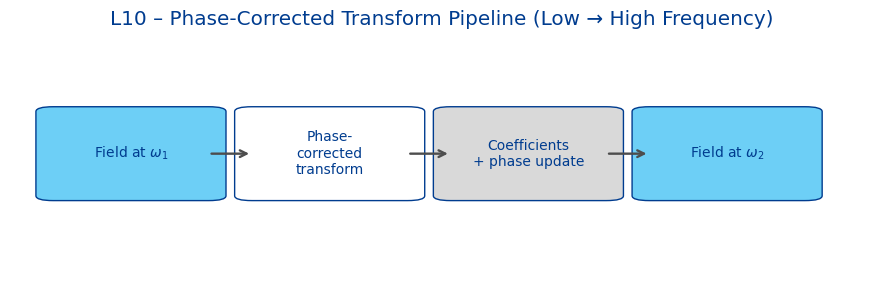

In [16]:
# %%  L10 Phase-Corrected Transform Pipeline
from matplotlib.patches import FancyBboxPatch

fig, ax = plt.subplots(figsize=(9,3))
ax.axis("off")

y = 0.5
w = 0.18
h = 0.35
x_positions = [0.05, 0.28, 0.51, 0.74]

labels = [
    r"Field at $\omega_1$",
    "Phase-\ncorrected\ntransform",
    "Coefficients\n+ phase update",
    r"Field at $\omega_2$",
]

colors = [TUD_LIGHT_BLUE, "white", TUD_LIGHT_GREY, TUD_LIGHT_BLUE]

for x, label, col in zip(x_positions, labels, colors):
    box = FancyBboxPatch((x, y-h/2), w, h,
                         boxstyle="round,pad=0.02",
                         edgecolor=TUD_DARK_BLUE, facecolor=col)
    ax.add_patch(box)
    ax.text(x + w/2, y, label, ha="center", va="center", fontsize=10, color=TUD_DARK_BLUE)

# Arrows
for i in range(len(x_positions)-1):
    x1 = x_positions[i] + w
    x2 = x_positions[i+1]
    ax.annotate("", xy=(x2, y), xytext=(x1, y),
                arrowprops=dict(arrowstyle="->", color=TUD_DARK_GREY, lw=1.7))

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_title("L10 – Phase-Corrected Transform Pipeline (Low → High Frequency)", color=TUD_DARK_BLUE)

plt.tight_layout()
savefig("L10")
plt.show()


Saved: notebooks/plaatjes/figures\L11.png


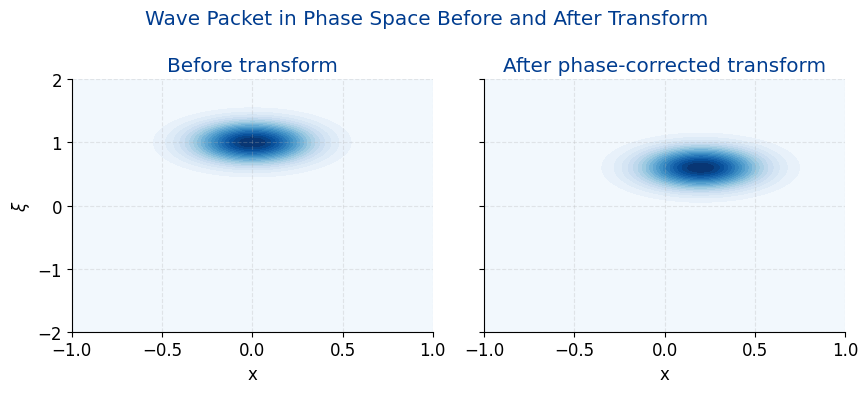

In [40]:
# %% L11 Wave Packet in Phase Space Before/After
fig, axes = plt.subplots(1, 2, figsize=(9,4), sharex=True, sharey=True)

x = np.linspace(-1, 1, 200)
xi = np.linspace(-2, 2, 200)
X, XI = np.meshgrid(x, xi)

# Before: packet centered near (0,1)
packet_before = np.exp(-10*(X**2 + (XI-1)**2))

# After: rotated/shifted packet
packet_after = np.exp(-10*((X-0.2)**2 + (XI-0.6)**2))

cs1 = axes[0].contourf(X, XI, packet_before, 20, cmap="Blues")
axes[0].set_title("Before transform", color=TUD_DARK_BLUE)
axes[0].set_xlabel("x")
axes[0].set_ylabel(r"$\xi$")

cs2 = axes[1].contourf(X, XI, packet_after, 20, cmap="Blues")
axes[1].set_title("After phase-corrected transform", color=TUD_DARK_BLUE)
axes[1].set_xlabel("x")

plt.suptitle("Wave Packet in Phase Space Before and After Transform", color=TUD_DARK_BLUE)
plt.tight_layout()
savefig("L11")
plt.show()


Saved: notebooks/plaatjes/figures\L12.png


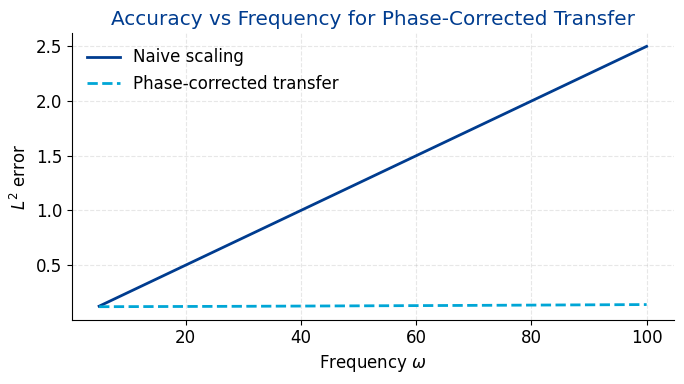

In [39]:
# %% L12 Accuracy vs Frequency (Naive vs Phase-Corrected)
omega = np.linspace(5, 100, 200)

# Toy L2 errors
err_naive = 0.5 * (omega/20.0)
err_phase = 0.12 + 0.02 * (omega/100.0)**1.3

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(omega, err_naive, lw=2, label="Naive scaling")
ax.plot(omega, err_phase, lw=2, label="Phase-corrected transfer", linestyle="--")

ax.set_xlabel(r"Frequency $\omega$")
ax.set_ylabel(r"$L^2$ error")
ax.set_title("Accuracy vs Frequency for Phase-Corrected Transfer", color=TUD_DARK_BLUE)
ax.legend(frameon=False)
ax.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
savefig("L12")
plt.show()
